# Supplementary Fig. 11a: Distribution of Satellite repeats in *Xenopus tropicalis*

### To run TRF:

```bash
nohup ./trf409.linux64 YOUR_GENOME.fa 2 5 7 80 10 50 2000 -l 6 -d -h -ngs > Xentr10.Chr1.out 2> Xentr10.Chr1.err &
```
What this program does is runs process the outputs from TRF and makes a non-redundant database of the monomers of all tandems

In [23]:
import os
import string
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

source_data = os.path.join('SourceData','Supplementary_Fig.11')
fig_file_path = os.path.join(source_data, 'Supplementary_Fig.11a')

Mb = 1000000
chr_sizes = pd.read_csv(os.path.join(source_data,"Xentr10.chrom.sizes"), sep="\t", names=["Chr","Length"])
Telomere_bounds = pd.read_csv(os.path.join(fig_file_path,"Telomere_bounds.tab"), sep="\t", index_col=0)
Xtrop_centromere_positon = pd.read_csv(os.path.join(source_data,"Xtr_centromeric_repeats.tsv"), sep="\t")
Xtrop_centromere_positon = Xtrop_centromere_positon[Xtrop_centromere_positon.Specie=="Xtr"].copy()

blast_Cent_consensus_file = os.path.join(fig_file_path,'monomers.motif.blast')
blast_Cent_consensus_ = pd.read_csv(blast_Cent_consensus_file, sep='\t', names=['qseqid','Chr','pident','length','mismatch','gapopen','qstart','qend','sstart','send','evalue','bitscore'])
blast_Cent_consensus_ = blast_Cent_consensus_[blast_Cent_consensus_.Chr.str.startswith('Chr')]
blast_Cent_consensus_['midpoint'] = (blast_Cent_consensus_.sstart + blast_Cent_consensus_.send) / 2
blast_Cent_consensus_ = blast_Cent_consensus_.sort_values(['Chr','sstart','send'])
blast_Cent_consensus_['slength']  = (blast_Cent_consensus_.send - blast_Cent_consensus_.sstart).apply(lambda x: abs(x))

Selected_motifs = pd.read_csv(os.path.join(fig_file_path,"Selected_motifs.tsv"), sep="\t", names=["Motif"])
Selected_motifs.loc[:,'ID'] =  Selected_motifs.index.to_series().apply(lambda x: list(string.ascii_uppercase + string.ascii_lowercase)[int(x)])
Selected_motifs.loc[:,'Motif size'] = Selected_motifs.Motif.apply(lambda x: x.split(';')[-1])
Selected_motifs.loc[:,'index'] = Selected_motifs.index.to_series()
Selected_motifs.loc[:,'Extended_name'] = Selected_motifs.ID+' ('+Selected_motifs['Motif size']+' bp)'

N_256=float(256)
grey_ = (.75,.75,.75)
cb_1 = 'purple'
cb_2 = (55/N_256,86/N_256,142/N_256)
cb_3 = (33/N_256,140/N_256,143/N_256)
cb_6 = (206/N_256,221/N_256,40/N_256)
cb_7 = (1,0,0)
col_bld = [cb_1,cb_2,cb_3, cb_6, cb_7] 
col_blind = LinearSegmentedColormap.from_list('col_blind', col_bld, N=Selected_motifs.shape[0]+1)

Selected_motifs.loc[:,'Color'] =  Selected_motifs.index.to_series().apply(lambda x: col_blind(Selected_motifs.shape[0]-x))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Saved as SourceData/Supplementary_Fig.11/Xtropicalis_Final_Tandem_Monomers_1000ppi.png


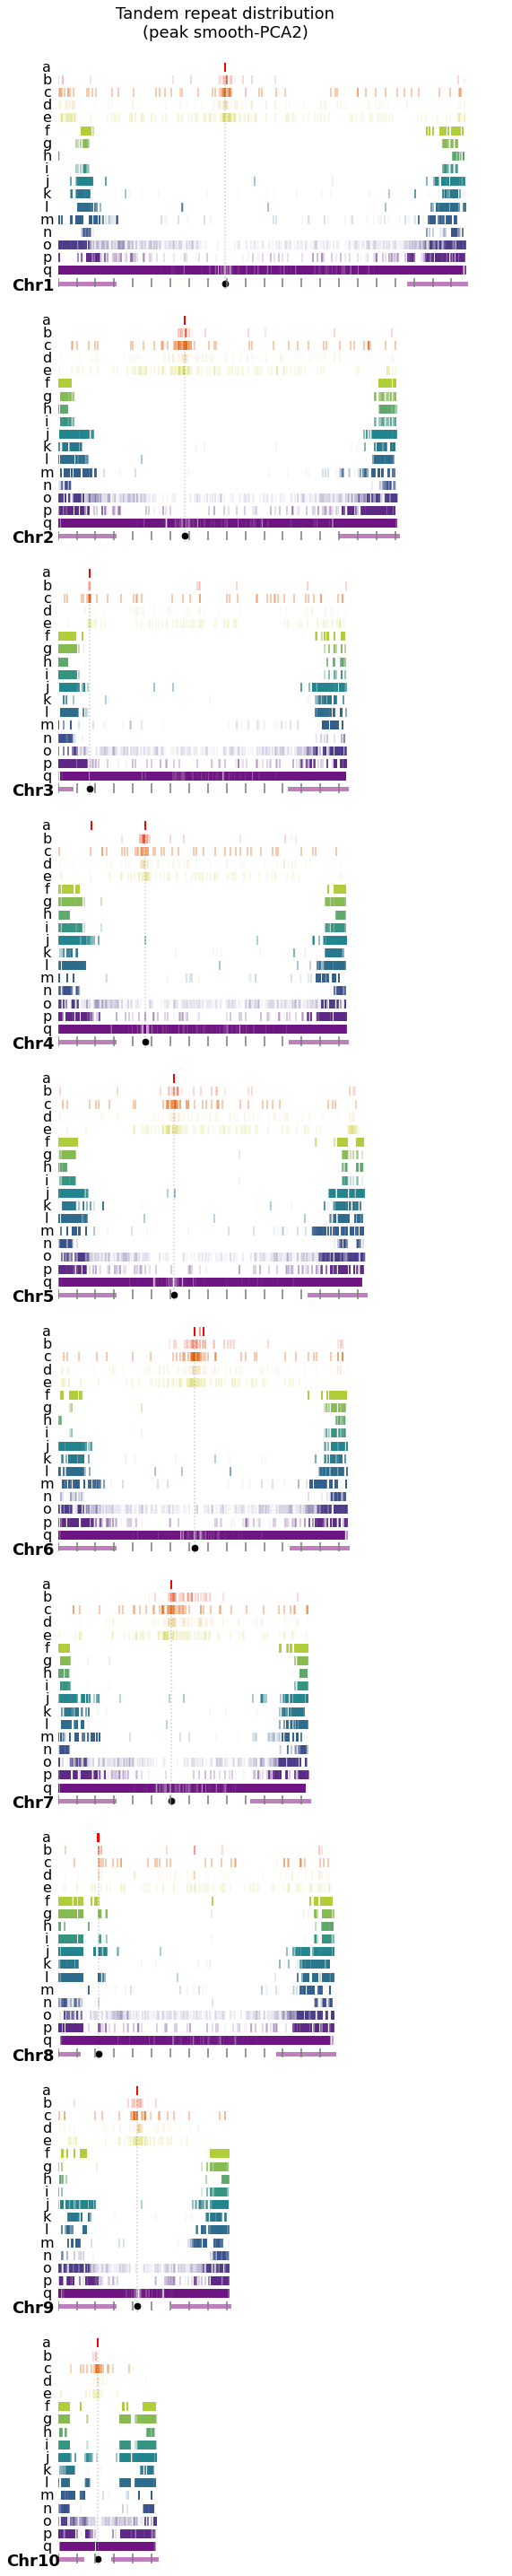

In [24]:
title = 'Tandem repeat distribution\n(peak smooth-PCA2)'

list_chromosomes = chr_sizes.Chr.tolist()
CTR_pos_Chr1 = list(Xtrop_centromere_positon[Xtrop_centromere_positon.Chr=='Chr1'].TandemRepeats)[0]
Largest_chr_len = float(chr_sizes.Length.max())*1.1

max_y_value, max_axis = 1,1
min_axis = 0

counter = 0
fig, axs = plt.subplots(len(list_chromosomes), figsize=(8,4*len(list_chromosomes)))

for Chr_ in list_chromosomes:    
    To_plot = blast_Cent_consensus_[(blast_Cent_consensus_.Chr==Chr_) & (blast_Cent_consensus_.pident > 85)] ## ***85%
    
    Chr_size_ = list(chr_sizes[chr_sizes.Chr==Chr_].Length)[0]
    CTR_pos = list(Xtrop_centromere_positon[Xtrop_centromere_positon.Chr==Chr_].TandemRepeats)[0]
    delta_centromere = 0  #CTR_pos_Chr1 - CTR_pos
    CTR_pos_normalized  = (CTR_pos   + delta_centromere) / Largest_chr_len
    chr_size_normalized = (Chr_size_ + delta_centromere) / Largest_chr_len

    CTR_pos_normalized_ = (list(Xtrop_centromere_positon[Xtrop_centromere_positon.Chr==Chr_].TandemRepeats)[0] + delta_centromere) / Largest_chr_len
    axs[counter].scatter(CTR_pos_normalized_, 0.025, alpha=1, s=45, color='black', edgecolors='black',  marker="o")
    if counter == 0:
        axs[counter].text(CTR_pos_normalized, (max_axis)*1.1, title, fontsize=18, horizontalalignment='center')

    axs[counter].set_xlim((0, 1))
    axs[counter].set_ylim((min_axis*1.3, max_axis*1.1))
#    axs[counter].text((CTR_pos+delta_centromere)/Largest_chr_len, -.045, Chr_, fontsize=20, ha='center')
    axs[counter].text(delta_centromere/Largest_chr_len-.055, 0.015, Chr_, fontsize=18, fontweight='bold', ha='center', va='center')

    axs[counter].axvline(CTR_pos_normalized_, ymin=0, ymax=.85,  alpha=.2, color='black', linewidth=1.5, linestyle=":")
  #  axs[counter].axhline(0.025, xmin=(PCA_peak[PCA_peak.Chr==Chr_].Start.to_list()[0]  +delta_centromere)/Largest_chr_len , xmax= (PCA_peak[PCA_peak.Chr==Chr_].End.to_list()[0]  +delta_centromere)/Largest_chr_len,  alpha=.5, color='red', linewidth=5)
  #  axs[counter].axvline((Centurion3[Centurion3.Chr==Chr_].Centurion.to_list()[0] +delta_centromere)/Largest_chr_len , ymin=0, ymax=.89,  alpha=.2, color='black', linewidth=2, linestyle="--")
 
    axs[counter].axhline(0.025, xmin=(delta_centromere / Largest_chr_len), xmax=((Telomere_bounds[Telomere_bounds.Chr==Chr_].End_p.to_list()[0] + delta_centromere) / Largest_chr_len), alpha=.5, color='purple', linewidth=5)
    axs[counter].axhline(0.025, xmin=((Telomere_bounds[Telomere_bounds.Chr==Chr_].Start_q.to_list()[0] + delta_centromere) / Largest_chr_len), xmax=chr_size_normalized, alpha=.5, color='purple', linewidth=5)
    axs[counter].axhline(0.025, xmin=((CTR_pos + delta_centromere + 7.5*Mb) / Largest_chr_len), xmax=((CTR_pos + delta_centromere + 7.5*Mb) / Largest_chr_len),  alpha=.5, color='red', linewidth=5)


    for tick_10Mb in range(0, Chr_size_, 10*Mb):
        normalized_tick = (tick_10Mb + delta_centromere) / Largest_chr_len  
        axs[counter].axvline(normalized_tick, ymin=0.01, ymax= .04,  alpha=.8, color='gray', linewidth=2)
        
    ypos_inc = increment = (1 / float(Selected_motifs.shape[0] + 1))
    ypos_inc = ypos_inc + 0.025
    for repeat_name in Selected_motifs.Motif.to_list()[::-1]:
        axs[counter].scatter(np.array((To_plot[To_plot.qseqid==repeat_name].midpoint + delta_centromere)/Largest_chr_len), len(To_plot[To_plot.qseqid==repeat_name].midpoint)*[ypos_inc], marker='|', alpha=.9 , s=100, linewidth=0.1,  color=Selected_motifs[Selected_motifs.Motif==repeat_name].Color.to_list()[0])
#        axs[counter].text(chr_size_normalized*1.005, ypos_inc, Selected_motifs[Selected_motifs.Motif==repeat_name].ID.to_list()[0], fontsize=13, ha='left', va='center')
        axs[counter].text(delta_centromere/Largest_chr_len-.025, ypos_inc, str(Selected_motifs[Selected_motifs.Motif==repeat_name].ID.to_list()[0]).lower(), fontsize=16, ha='center', va='center')
        ypos_inc = increment + ypos_inc
        
    axs[counter].spines['top'].set_visible(False)
    axs[counter].spines['right'].set_visible(False)
    axs[counter].spines['bottom'].set_visible(False)
    axs[counter].spines['left'].set_visible(False)
    axs[counter].get_xaxis().set_ticks([])
    axs[counter].get_yaxis().set_ticks([])
    
    counter=counter+1
    
plt.legend(bbox_to_anchor=(.2,1), frameon=False)
plt.tight_layout()
plt.subplots_adjust(wspace=0.0015,hspace=0.005)

out_fig_name = os.path.join(fig_file_path,'Xtropicalis_Final_Tandem_Monomers_1000ppi.png')
print("Saved as", out_fig_name)
plt.savefig(out_fig_name,bbox_inches='tight', transparent=True, dpi=1200)
plt.show()


Saved as ~/SAPS/X_tropicalis_V10_Final/DATA_OUT/Xtropicalis_Final_Tandem_Monomers_IDs.svg


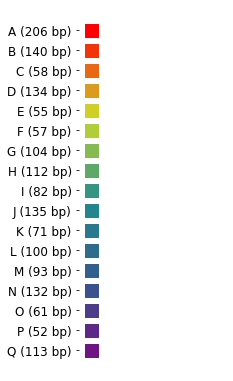

In [ ]:
#Make legend for figure

fig = plt.figure(frameon=False,figsize=(2,5))
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter([0]*Selected_motifs.shape[0], Selected_motifs.index.to_list(), c=Selected_motifs.Color.to_list()[::-1], s=180, marker="s")
plt.yticks(Selected_motifs.index.to_list(),Selected_motifs.Extended_name.apply(lambda x: x.replace('_X2','')).to_list()[::-1], fontsize=12)
plt.xticks([],[])
plt.xlim(-0.05,0.5)
plt.ylim(-1,Selected_motifs.shape[0])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


out_fig_name = os.path.join(fig_file_path,'Xtropicalis_Final_Tandem_Monomers_IDs.svg')
print("Saved as", out_fig_name)
plt.savefig(out_fig_name,bbox_inches='tight', transparent=True)

plt.show()